In [1]:
!pip install tensorflow

In [13]:
# Imoprting Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix 
import seaborn as sns

In [14]:
# CNN Model Building
classifier = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation='relu'), MaxPooling2D(pool_size=(2,2)), Flatten(), Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
classifier.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
# Dataset Reading
data_path = r"C:\PERSONAL\Bala\Bala_MTECH\3 rd sem\Internship\Intern-Github\Cat Vs Dog\PetImages"

In [24]:
# Data Generator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)       
                 
# 20% for Validation
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train Data
train_set = train_datagen.flow_from_directory(data_path, target_size=(64,64), batch_size=32, class_mode='binary', subset='training')

# Validation Data
val_set = test_datagen.flow_from_directory(data_path, target_size=(64,64), batch_size=32, class_mode='binary', subset='validation')

print("Train samples:", train_set.n)
print("Validation samples:", val_set.n)
print("Batch size:", train_set.batch_size)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Train samples: 20000
Validation samples: 4998
Batch size: 32


In [25]:
import os
from PIL import Image

bad_files = []
data_dir =  r"C:\PERSONAL\Bala\Bala_MTECH\3 rd sem\Internship\Intern-Github\Cat Vs Dog\PetImages" # 👈 change this path to your actual dataset folder

for root, dirs, files in os.walk(data_dir):
    for name in files:
        file_path = os.path.join(root, name)
        try:
            img = Image.open(file_path)
            img.verify()  # Check if it can be opened
        except Exception as e:
            bad_files.append(file_path)
            print(f"Bad file detected: {file_path}")


In [26]:
import os
for f in bad_files:
    try:
        os.remove(f)
        print("Removed:",f)
    except:
        pass

In [27]:
# Model Training
history = classifier.fit(train_set, epochs=10, validation_data=val_set)

# Saving the Model
classifier.save("cat_dog_cnn.h5")
print("Training Complete & Model Saved!")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.7489 - loss: 0.5108 - val_accuracy: 0.7649 - val_loss: 0.4782
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 239ms/step - accuracy: 0.7704 - loss: 0.4790 - val_accuracy: 0.7581 - val_loss: 0.5048
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.7854 - loss: 0.4535 - val_accuracy: 0.7777 - val_loss: 0.4793
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.7940 - loss: 0.4400 - val_accuracy: 0.8067 - val_loss: 0.4145
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.8072 - loss: 0.4199 - val_accuracy: 0.7925 - val_loss: 0.4465
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.8147 - loss: 0.4051 - val_accuracy: 0.8081 - val_loss: 0.4045
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 236ms/step - accuracy: 0.8173 - loss: 0.3990 - val_accuracy: 0.8135 - val_loss: 0.4046
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8222 -

Training Complete & Model Saved!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


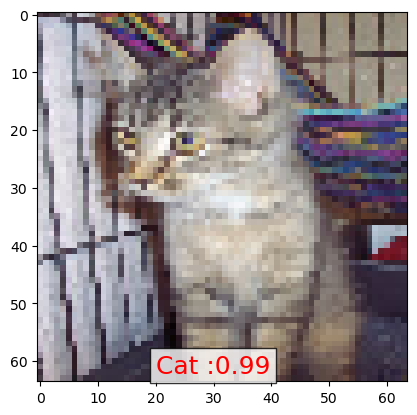

In [28]:
#Prediction of Single Image
img1 = image.load_img(r"C:\PERSONAL\Bala\Bala_MTECH\3 rd sem\Internship\Intern-Github\Cat Vs Dog\PetImages\Cat\2.jpg", target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255

# Create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) 
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [29]:
#Prediction on Validation Data
val_set.reset()
ytesthat = classifier.predict(val_set)

df = pd.DataFrame({'filename': val_set.filenames,'predict': ytesthat[:, 0],'y': val_set.classes})
df.head()

157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step


,filename,predict,y
0,Cat\0.jpg,0.259950,0
1,Cat\1.jpg,0.081534,0
2,Cat\10.jpg,0.136153,0
3,Cat\100.jpg,0.022432,0
4,Cat\1000.jpg,0.085495,0


In [31]:
#Converting Predicted Probabilities into Class Labels
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Cat\0.jpg,0.25995,0,0
1,Cat\1.jpg,0.08153,0,0
2,Cat\10.jpg,0.13615,0,0
3,Cat\100.jpg,0.02243,0,0
4,Cat\1000.jpg,0.08549,0,0
5,Cat\10000.jpg,0.85229,0,1
6,Cat\10001.jpg,0.87421,0,1
7,Cat\10002.jpg,0.68752,0,1
8,Cat\10003.jpg,0.92141,0,1
9,Cat\10004.jpg,0.01524,0,0


In [32]:
#Number of Miscalssified Images
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 2489


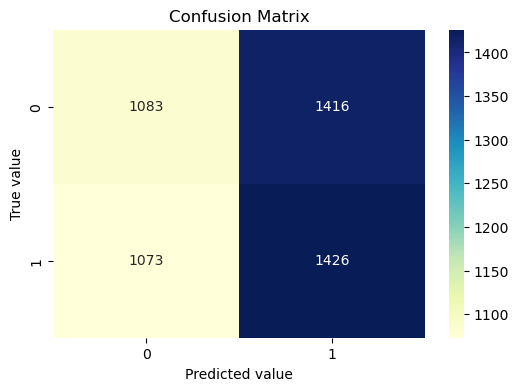

In [33]:
#Confusion Matrix Plot 
df["y_pred"] = (df["predict"] > 0.5).astype(int)
conf_matrix = confusion_matrix(df["y"], df["y_pred"])
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True, fmt='g')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.title("Confusion Matrix")
plt.show()

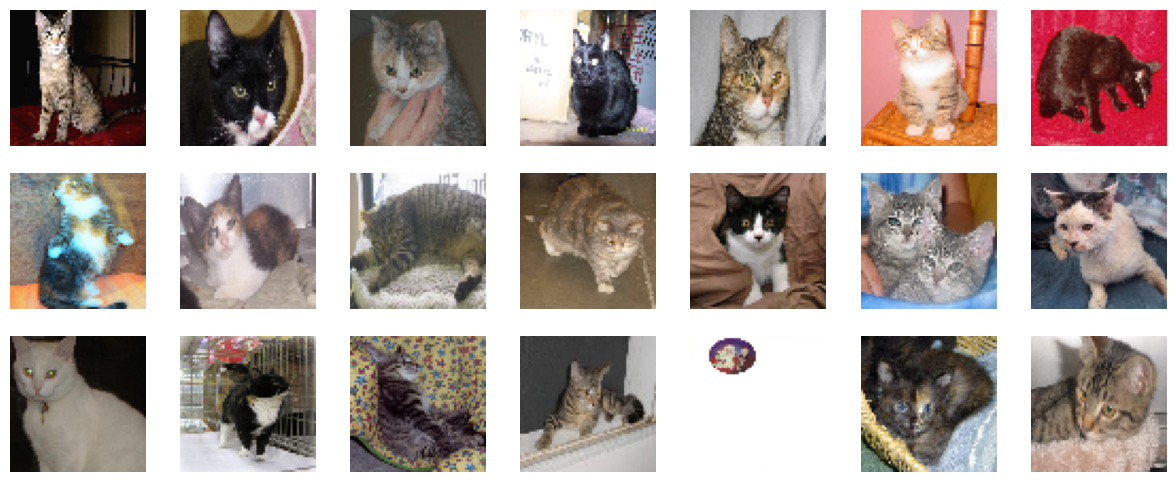

In [34]:
# Display of Grid of Cat Images Classified as Dog

base_dir =r"C:\PERSONAL\Bala\Bala_MTECH\3 rd sem\Internship\Intern-Github\Cat Vs Dog\PetImages"
CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig = plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(min(columns * rows, len(CatasDog))):
    img_path = base_dir + "\\" + CatasDog.iloc[i]   # ✅ Correct path
    img = image.load_img(img_path, target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

<Figure size 1500x600 with 0 Axes>

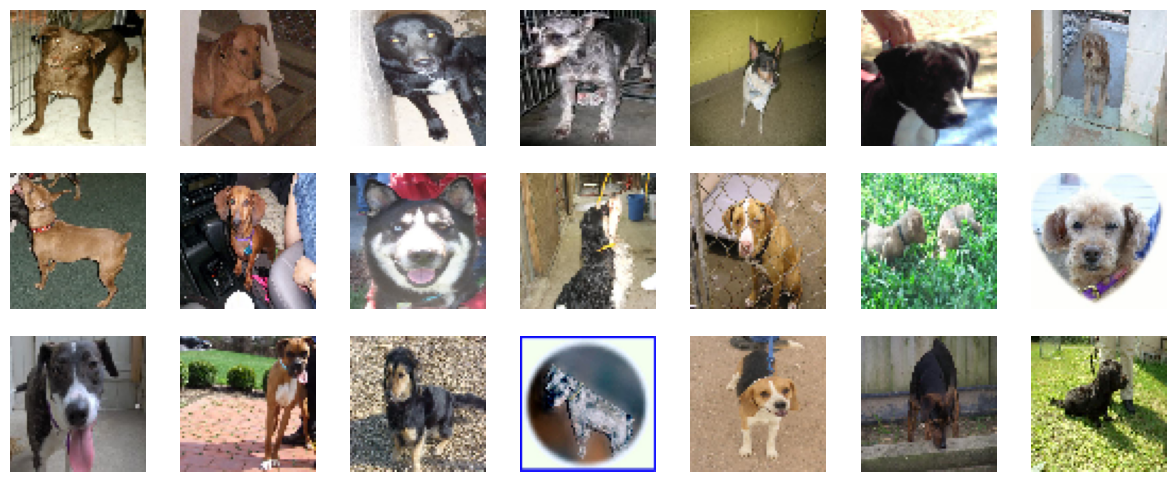

In [36]:
# Display of Grid of Dog Images Classified as Cat

base_dir = r"C:\PERSONAL\Bala\Bala_MTECH\3 rd sem\Internship\Intern-Github\Cat Vs Dog\PetImages"
DogasCat = df['filename'][(df.y==1) & (df.y_pred==0)]
fig = plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(min(columns * rows, len(DogasCat))):
    img_path = base_dir + "\\" + DogasCat.iloc[i]    # ✅ Correct path
    img = image.load_img(img_path, target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [37]:
#Model Summary
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

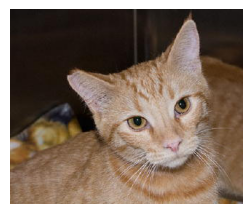

In [38]:
# CNN Feature Map Visulaization
# Path & Image Loading

base_dir = r"C:\PERSONAL\Bala\Bala_MTECH\3 rd sem\Internship\Intern-Github\Cat Vs Dog\PetImages"
img_path = base_dir + r"\Cat\14.jpg"     # Test image

# Show image
img1 = image.load_img(img_path)
plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.axis("off")
plt.show()

In [39]:
#Preprocess
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1) / 255.0
img = np.expand_dims(img, axis=0)
input_tensor = classifier.layers[0].input

In [40]:
#Convolution Layers
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'flatten_2', 'dense_4', 'dense_5']


In [42]:
from tensorflow.keras.models import Model
tf.get_logger().setLevel('ERROR')

# Extract Target Layers
target_layers = ["conv2d_4", "conv2d_5"]     
feature_maps = {}

for lname in target_layers:
    submodel = Model(inputs=input_tensor, outputs=classifier.get_layer(lname).output)
    feature_maps[lname] = submodel.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


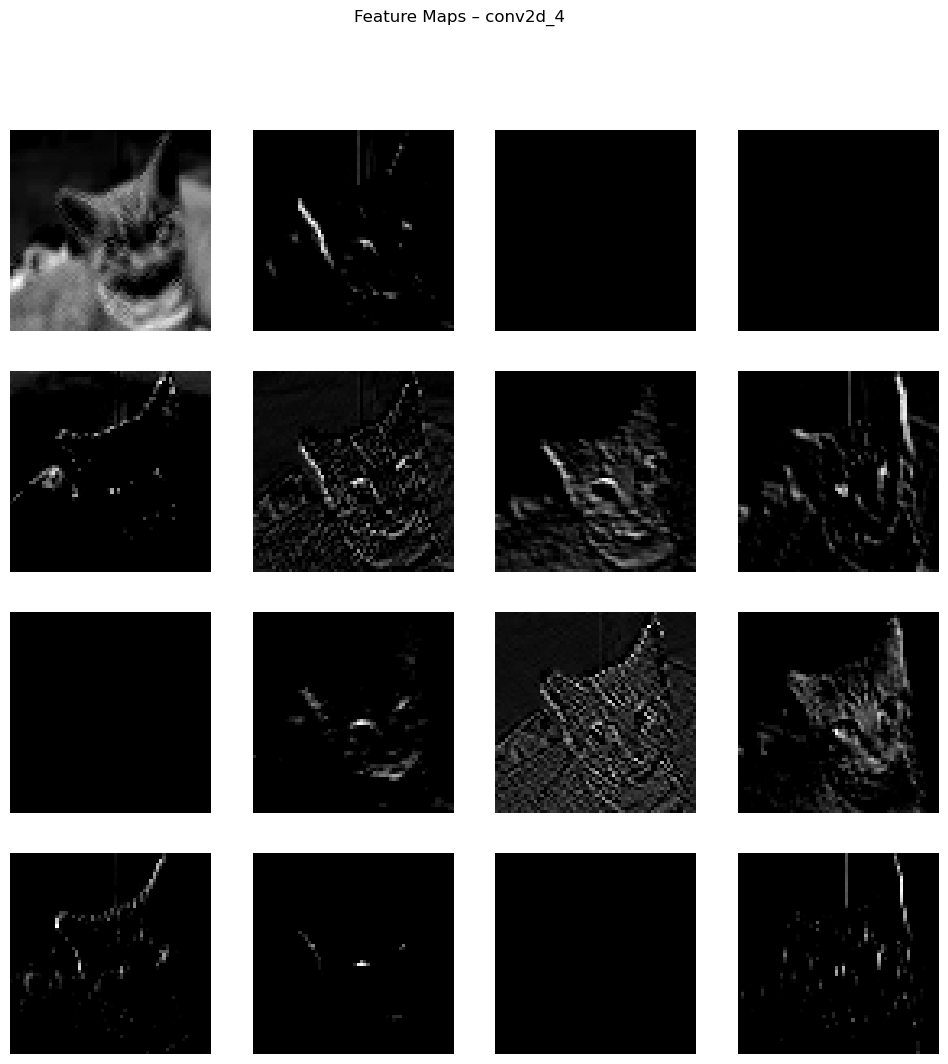

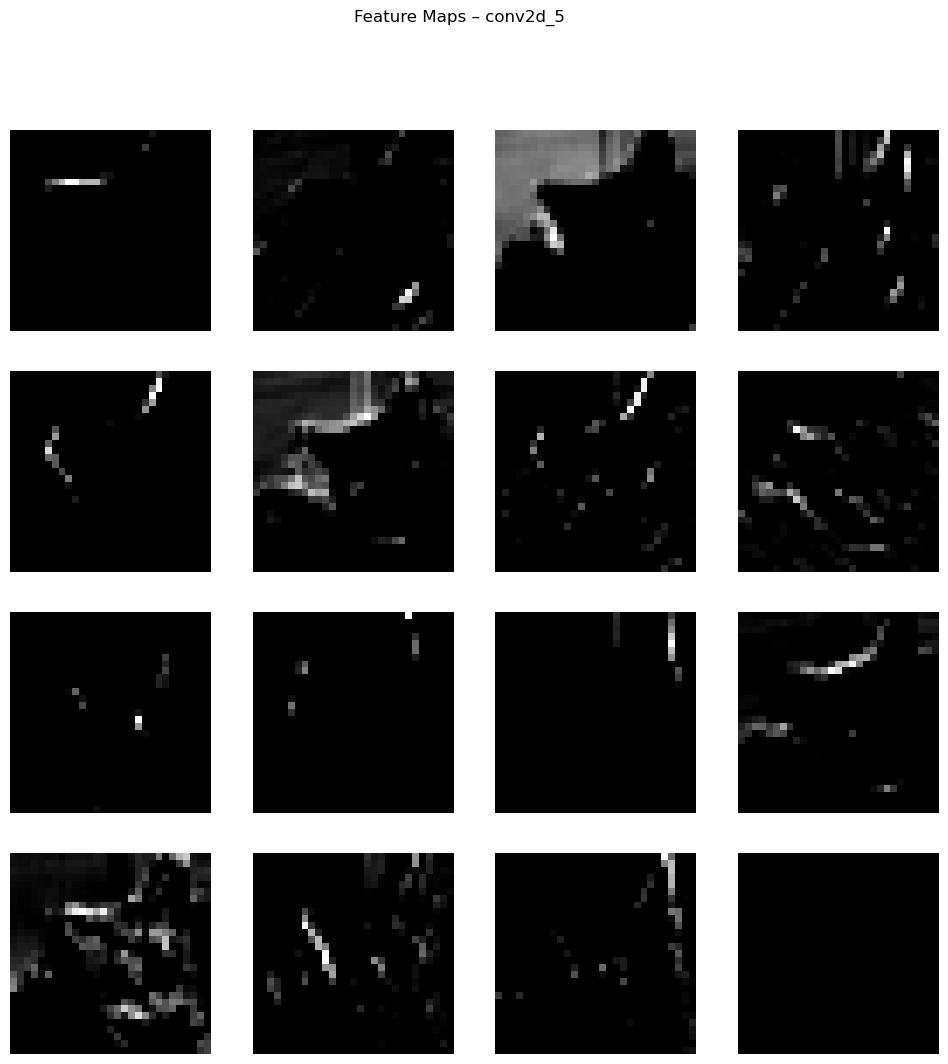

In [43]:
# Visualise Feature Maps
for lname, fmap in feature_maps.items():
    fmap = fmap[0]    
    num_channels = fmap.shape[-1]
    n_show = min(num_channels, 16)
    plt.figure(figsize=(12, 12))
    plt.suptitle(f"Feature Maps – {lname}")
    for i in range(n_show):
        plt.subplot(4, 4, i+1)
        plt.imshow(fmap[:, :, i], cmap="gray")
        plt.axis("off")
    plt.show()

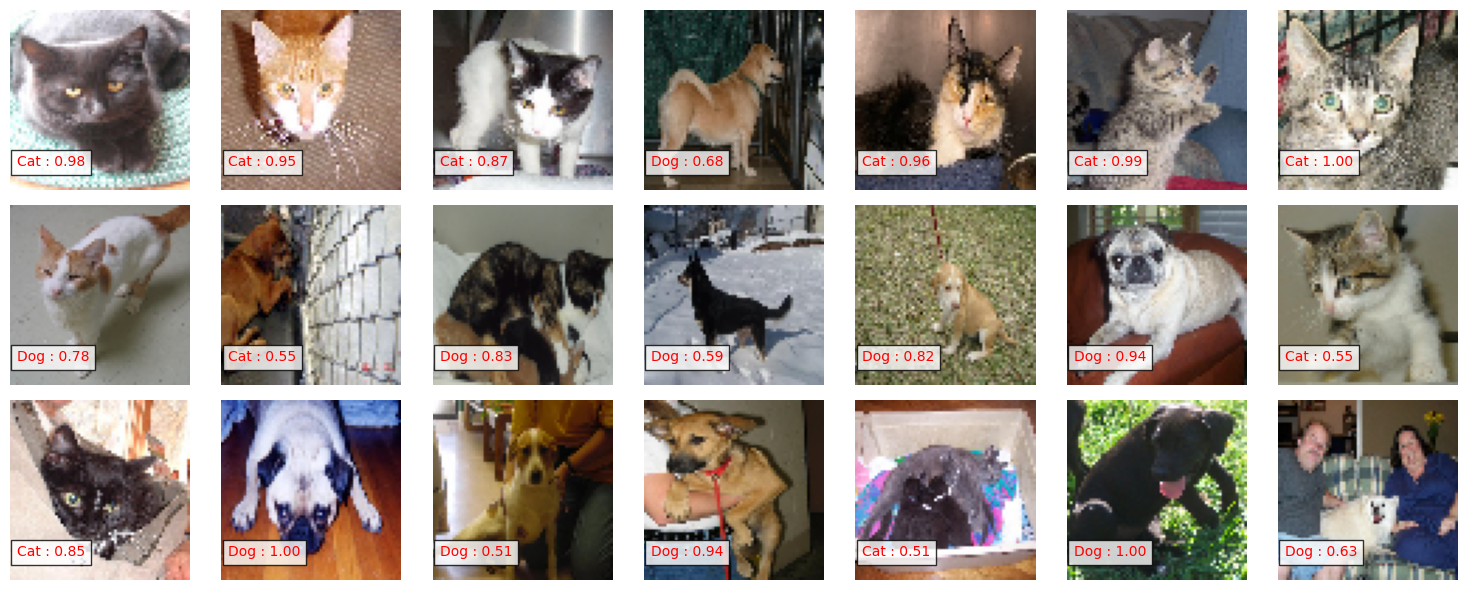

In [44]:
#Image Prediction in the Entire Dataset
total_images = len(val_set.filenames)
fig = plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    
    # Random file index
    img_index = np.random.choice(range(total_images))

    # Correct path
    img_path = val_set.filepaths[img_index]   

    # Load image
    img1 = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img1) / 255.0
    img = np.expand_dims(img, axis=0)

    # Prediction
    prediction = classifier.predict(img, verbose=0)

    if prediction[0][0] > 0.5:
        value = "Dog : %1.2f" % (prediction[0][0])
    else:
        value = "Cat : %1.2f" % (1 - prediction[0][0])

    # Text
    plt.text(2, 55,value,color="red",fontsize=10, bbox=dict(facecolor="white", alpha=0.8))
    plt.imshow(img1)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [45]:
#Accuracy on Train and Test Images
train_loss, train_acc = classifier.evaluate(train_set)
test_loss, test_acc   = classifier.evaluate(val_set)

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)

625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.8437 - loss: 0.3480
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.8181 - loss: 0.4051
Train Accuracy : 0.8436999917030334
Test Accuracy  : 0.8181272745132446
